# Clustering
<p/>
author: Michael Stephenson
<p/>


 ### Part I: Research Question







<p/>

##### A1. Question

<p/>

Identifying customers as groups within the entire population may be useful for associating customer accounts that churn or cancel services among a subset of customers to identify possible factors that create a circumstance that a customer does cancel. This study should address the question: Can the customer data be subdivided into groups identified with churn events?

<p/>
 
##### A2. Goal

<p/>

The goal is to use K-means to understand customer data and determine the number of groups the data can be divided into to effectively identify churn’s association with other variables in the customer dataset. 


 ### Part II: Technique Justification




#### B.1 Clustering Technique and Outcome

Partitioning unlabeled data into several distinct groupings is what the K-means algorithm does. It finds observations that share important characteristics and classifies them together into clusters. The algorithm is a two-step processing. We select a value for k (the number of collections) and randomly select each group's initial centroid (center coordinates). Choosing the number of clusters (k) is itself a problem. Perfect solutions to choosing k do not exist, but one popular heuristic is the elbow approach. K-means doesn't necessarily converge to the global minima. It may converge to local minima depending on which values we choose for our initial centroids. K-medoids have overcome this issue. This algorithm uses medoids rather than centroids as the center point. Adjusting updating from the standard K-means algorithm is required to use medoids. (Jeffares, 2019)

<p/>

The update phase is a swap phase when swapping the current medoid with other observations in the cluster is done sparingly. Categorical variables do not work with K-means. K-modes is a solution to cluster categorical variables. K-prototypes algorithm is essentially a mixture of K-means and K-modes. K-prototypes work by combining the distance measure for numerical attributes and the dissimilarity measure for categorical attributes. Unsupervised approaches such as k-means have drawbacks because the assessing method has no solution. Did the solution capture the cluster structure sufficiently? K-means can be used to examine the stability of a clustering solution. In the unstructured data, the clusterings are far more inconsistent. Comparing the locations of cluster means can quantify the stability more rigorously. Partitioning observations into a single cluster is a hard clustering approach. Soft clustering gives us an estimate of the probability that an observation belongs to each of the centroids, in the case of Fuzzy C-means. (Jeffares, 2019)


<p/>

Note:
The expected outcome from using K-means on the dataset will be an observation about whether the data has stability and whether K sufficiently captures the cluster structure. 



#### B.2 Assumptions of Clustering:

<p/>

K-Means clustering makes two assumptions regarding the clusters. Spherical assumption helps separate the clusters when the algorithm works on the data and forms clusters. Accomplishing clusters in K-means takes the mean of points in the cluster. It assumes that one can start with the centers of clusters anywhere and make the second assumption regarding cluster size and boundaries possible. (Analytics, 2017)

#### B.3 Packages for K-means Clustering:

Scikit-learn - Built on NumPy, SciPy, and matplotlib and is a valuable machine learning tool for clustering. 

Numpy - Support for large, multi-dimensional arrays and matrices

Matplotlib - Comprehensive library for creating static, animated, and interactive visualizations in Python

Pandas - Data analysis and manipulation tools.

Seaborn - Data visualization library based on matplotlib.


 ### Part III: Data Preparation





#### C1. Data Preprocessing Goal

<p/>

The data is made up of continuous and categorical data. Missing continuous data can be imputed with the mean but the categorical data has no central tendency therefore will only be dropped. Categorical data will then be encoded for computer data operations, nominal, ordinal, and binary respectively.  

<p/>

#### C2. Initial data classification: 

<p/>
    
Categorical Predictor Data:
    
<p/>
    
<ul>
<li>Education</li>
<li>Employment</li>
<li>Marital</li>
<li>Gender</li>
<li>Churn</li>
<li>Techie</li>
<li>Contract</li>
<li>Port_modem</li>
<li>Tablet</li>
<li>InternetService</li>
<li>Phone</li>
<li>Multiple</li>
<li>OnlineSecurity</li>
<li>OnlineBackup</li>
<li>DeviceProtection</li>
<li>TechSupport</li>
<li>StreamingTV</li>
<li>StreamingMovies</li>
<li>PaperlessBilling</li>
<li>PaymentMethod</li>
<li>Multiple</li>
</ul>
    
<p/>

<p/>
    
Continuous Predictor Data <p/>
<ul>
<li> Children</li>
<li> Age</li>
<li> Income</li>
<li> Outage_sec_perweek</li>
<li> Tenure</li>
<li> MonthlyCharge</li>
<li> Bandwidth_GB_Year</li>
<li>Multiple</li>
</ul>
    
<p/>

<p/>
    
Discrete Ordinal Predictor Data 
    
<p/>
<ul>
<li>Yearly_equip_failure</li>
<li>Timely_Response</li>
<li>Timely_Fixes</li>
<li>Timely_Replacements</li>
<li>Respectful_Response</li>
<li>Options</li>
<li> Courteous_Exchange</li>
<li>Active_Listening</li>
</ul>
    
<p/>

 


#### C3. Steps to prepare the data for the analysis:

<p/>
The data cleaning process will begin with numeric feature scaling in numeric data. By changing the original variables to a similar scale to improve the interpretation of coefficients. Missing or faulty data can either make a system condition that throws an error or ignores the missing data to finish the computation, passively through standardization. Otherwise, missing data that is obvious to solving numeric matrices will be filtered by specific pattern of missing values. For example, “Not a Number” or (NaN) is present in Python arrays for missing numeric values and can be replaced with zero. Consistency of imputing data will be observed when working with both training and production data of either categoric or numeric types. Missing values can also be tracked for patterns to indicate if a bias is present within the data. (WGU, 2021) <p/>
Outliers will be addressed boxplots. Since outliers or anomalies are different from the rest of the data and represent an unusual case by mistake or issue that rarely occurs, imputing of deletion will be used to prevent distortions of a regression’s coefficient. (WGU, 2021) <p/>


In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [17]:
# import data set
dataset = pd.read_csv('churn_data.csv')
dataset.head(1)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,...,172.455519,904.53611,5,5,5,3,4,4,3,4


In [18]:
# identify features
dataset.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

Step 1. Remove unnecessary variables in the dataset:
<p/>
<code> 'Job','State','City','Timezone','Unnamed: 0','CaseOrder','Customer_id','Interaction','County','Zip','Lat', 'Lng','Population','Area','TimeZone','Email', 'Contacts'<code/> 

In [19]:
# reducing the data into a collection of categorical and numeric data

indexes=['Job','State','City','Timezone','Unnamed: 0','CaseOrder','Customer_id','Interaction','County','Zip','Lat', 'Lng','Population','Area','TimeZone','Email', 'Contacts']
for x in indexes:
    if x in dataset.columns:
        dataset.drop(x, axis=1, inplace=True)
dataset.head(1)

,UID,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,e885b299883d4f9fb18e39c75155d990,0,68,28561.99,Widowed,Male,No,7.978323,1,No,...,172.455519,904.53611,5,5,5,3,4,4,3,4


Step 2. Drop duplicated data:

In [20]:
#drop duplicates
dataset.drop_duplicates().reset_index(drop=True,inplace=True)

Step 3. Rename columns:

In [21]:
# rename columns
dataset.rename(columns = {'Item1':'Timely_Response','Item2':'Timely_Fixes','Item3':'Timely_Replacements','Item4':'Reliability','Item5':'Options','Item6':'Respectful_Response','Item7':'Courteous_Exchange','Item8':'Active_Listening'}, inplace = True)

Step 5. Drop all rows with missing categorical and numeric data, because imputing it results in a linear pattern within the residual continuous data, where it should be random, and imputed categorical data otherwise makes no sense.

In [22]:
dataset.dropna(inplace=True)

Verify no null values remain.

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UID                   10000 non-null  object 
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Marital               10000 non-null  object 
 5   Gender                10000 non-null  object 
 6   Churn                 10000 non-null  object 
 7   Outage_sec_perweek    10000 non-null  float64
 8   Yearly_equip_failure  10000 non-null  int64  
 9   Techie                10000 non-null  object 
 10  Contract              10000 non-null  object 
 11  Port_modem            10000 non-null  object 
 12  Tablet                10000 non-null  object 
 13  InternetService       10000 non-null  object 
 14  Phone                 10000 non-null  object 
 15  Multiple            

Step 6. Create a reduced dataset for Normalization. 

In [24]:
ScaleData = dataset[['Income', 'MonthlyCharge', 'Bandwidth_GB_Year','Outage_sec_perweek','Churn']].copy()
ScaleData.head(1)

,Income,MonthlyCharge,Bandwidth_GB_Year,Outage_sec_perweek,Churn
0,28561.99,172.455519,904.53611,7.978323,No


Step 8. Scale data

In [25]:
from sklearn.preprocessing import PowerTransformer 

scaler = PowerTransformer(method='yeo-johnson') #(Roy 2022)
numberOfColumns = ScaleData.columns[ScaleData.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

ScaleData[numberOfColumns] = scaler.fit_transform(ScaleData[numberOfColumns])

# Map Churn to Yes = 0 and No = 1
ScaleData['Churn']=dataset.Churn.map(dict(Yes=1, No=0))
ScaleData.head(1)

,Income,MonthlyCharge,Bandwidth_GB_Year,Outage_sec_perweek,Churn
0,-0.197902,0.087956,-1.213051,-0.679058,0


#### C.4 Save cleaned dataset

In [26]:
#Prepared data set saved
ScaleData.to_csv('churn_dataCleaned.csv')

 ### Part IV: Analysis





Step 1. Run K-Means with range of K with the Standardized data.

In [27]:
from sklearn.cluster import KMeans
from sklearn import datasets

#(K-Means Elbow Method code for Python 2019)
distortions = [] 
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ScaleData)
    distortions.append(kmeanModel.inertia_)

Step 2. Plot the distortions of K-Means with the Standardized data

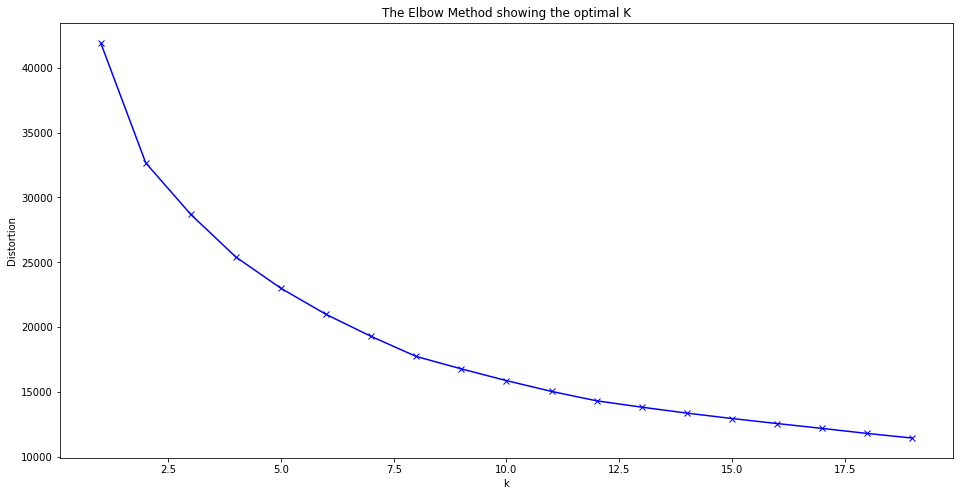

In [28]:
#(K-Means Elbow Method code for Python 2019)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K')
plt.show()

#### Result:
<p/>
The optimal case for n-clusters could logically be around 8 to 10 clusters for this dataset. For the purposes of this study K = 8 will be chosen.


In [29]:
#(K-Means Elbow Method code for Python 2019)

kmeanModel = KMeans(n_clusters=8)
kmeanModel.fit(ScaleData)

ScaleData['k_means']=kmeanModel.predict(ScaleData)



Text(0.5, 1.0, 'K_Means')

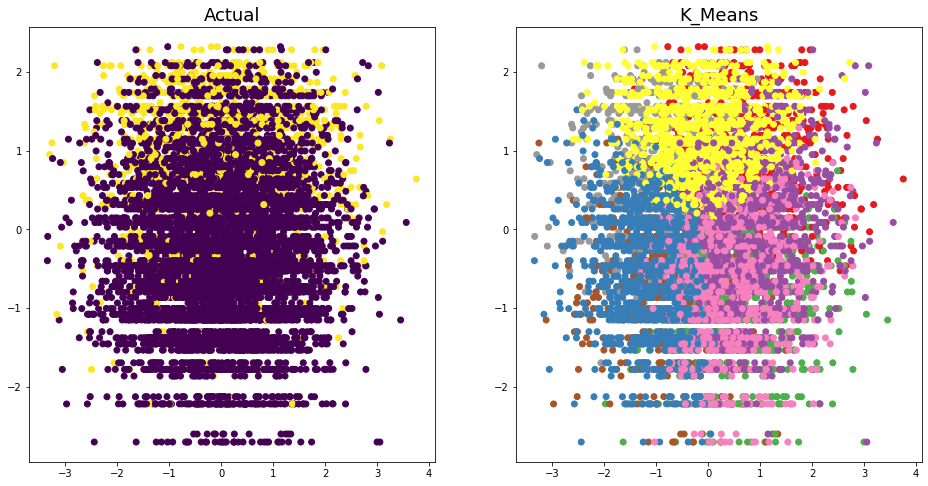

In [30]:
#(K-Means Elbow Method code for Python 2019)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(ScaleData['Outage_sec_perweek'], ScaleData['MonthlyCharge'], c=ScaleData['Churn'])
axes[1].scatter(ScaleData['Outage_sec_perweek'], ScaleData['MonthlyCharge'], c=ScaleData['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

#### Result:
<p/>
Comparing Actual to K-means scatterplots, it is apparent that defining n_clusters=8 does have an impact on the clusters found within the ScaleData dataset. 


 ### Part V: Data Summary and Implications





##### E 1. Accuracy in Clustering

<p/>

K-means is a “hard” clustering technique that makes clusters due to the numbers specified for K; in this example, k=8. There is no rule in K-means that guarantees that the number of clusters selected accurately fits the dataset; arbitrarily chosen clusters. Instead, this study attempts to obtain an accurate K using the Elbow Method above. However, this method is, at best, still an estimation based on the sum of squared distance (SSE) between cluster centroids and data points. The resulting “The Elbow Method showing the optimal K” graph seeks to identify the point where the curve begins to flatten out and choose this point as the value for K. (Imad 2018) 

###### E 2. Results and Implications of Clustering Analysis.

<p/>

The Churn dataset was loaded, cleaned, and standardized, then K-means analysis was then run in a range of 1 to 20 clusters to determine where the elbow of K occurs, found to be between 8 and 10 n_clusters for the data. The slop, in this case, is not observed to drop sharply but begins a gradual curve and begins flattening out past the 10 cluster range, shown in the “The Elbow Method showing the optimal K” elbow plot. Therefore one could assume that choosing a number between 8 and 10 for K will result in clusters that simplify but accurately display the relationships. 


###### E 3. Limitation
<p/>

A limitation to K-means is that the number of clusters cannot be determined automatically. Instead, K is derived from either the Elbow or Shadow Methods to choose a number for k then. K-means could be effective for some circumstances but may be problematic for extensive datasets.  


###### E 4. Course of Action 
<p/>

The outcome resulted in an estimation of 8 to 10 of total groups within the dataset is promising. However, there should be a method to clearly understand the upper limits of possible groups by using “soft” cluster analysis to automatically pick the number for K to represent the upper threshold of total groups to managers. Seeing the sub-groups within groups in this fashion will better help managers determine company behavior to slow the rate of churn and improve company revenue. 


### Sources:

<p/>

Analytics P. Exploring Assumptions of K-means Clustering using R | R-bloggers. Published August 7, 2017. https://www.r-bloggers.com/2017/08/exploring-assumptions-of-k-means-clustering-using-r/

<p/>

Imad Dabbura. K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks. Medium. Published September 17, 2018. https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

<p/>

Jeffares A. K-means: A Complete Introduction. Medium. Published November 19, 2019. https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c

<p/>



K-Means Elbow Method code for Python. Predictive Hacks. Published August 12, 2019. https://predictivehacks.com/k-means-elbow-method-code-for-python/

<p/>

Roy B. All about Feature Scaling. Medium. Published April 7, 2020. Accessed March 17, 2022. https://medium.com/p/bcc0ad75cb35

<p/>

Western Governor’s University. (June 2021). D206 Data Cleaning_Churn Data Consideration and Dictionary [PDF file]. <a href="https://access.wgu.edu/ASP3/aap/content/kgj47f8gj49f8du49d3k.html">https://access.wgu.edu/ASP3/aap/content/kgj47f8gj49f8du49d3k.html</a>